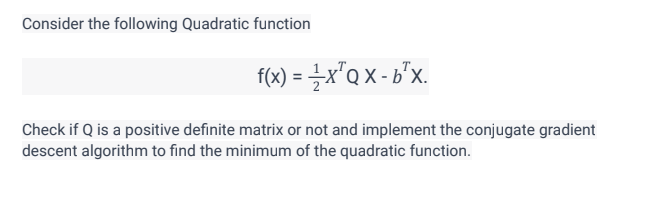

In [8]:
import numpy as np

In [9]:
#function
def function(Q, b, x):
    return 0.5 * np.dot(np.dot(x.T, Q), x) - np.dot(b.T, x)

#Check if Q is positive deffinite or not 
def isposdef(Q):
    if np.all(np.linalg.eigvals(Q) > 0):
        return True
    else:
        return False

In [10]:
import numpy as np

def conjugate_gradient_descent(Q, b, x0, max_iter=1000, tol=1e-6):
    if not isposdef(Q):
        raise ValueError("Q is not a positive definite matrix.")    
    #step 1
    x = x0
    g = Q @ x - b
    d = -g
    #step - 2
    alpha = g.T @ g / (d.T @ Q @ d)
    num_iter = 0

    #step - 3
    while np.linalg.norm(g) > tol and num_iter < max_iter:
        x = x + alpha * d
        g_prev = g
        g = Q @ x - b
        beta = (g.T @ g) / (g_prev.T @ g_prev)
        d = -g + beta * d
        alpha = g.T @ g / (d.T @ Q @ d)
        num_iter += 1
    return x, num_iter


In [11]:
# Test the implementation
Q = np.array([[6, -4], [-4, 4]])
b = np.array([-4,0])
x0 = np.array([0,0])
print("Q is positive definite matrix:", isposdef(Q))

Q is positive definite matrix: True


In [12]:
x ,num_iter = conjugate_gradient_descent(Q, b, x0)
print("Q is positive definite matrix:", isposdef(Q))
print("Minimum value of the Quadratic function:", function(Q, b, x))
print("Total number of iteration :", num_iter)

Q is positive definite matrix: True
Minimum value of the Quadratic function: -4.0
Total number of iteration : 2


<ipython-input-10-1cc4068c35e2>:21: RuntimeWarning: invalid value encountered in double_scalars
  alpha = g.T @ g / (d.T @ Q @ d)
